In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("house_rental_data.csv.txt")
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [21]:
# dropping "unnamed" column

df.drop(columns=["Unnamed: 0"], inplace=True)
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,cluster
0,-0.456393,2,7,2,2,2,0.000370,1
1,0.791798,5,7,4,2,2,0.449714,2
2,-0.507434,5,7,2,2,1,-0.111966,1
3,-0.089824,2,7,3,2,2,-0.477058,1
4,-0.730160,11,14,3,2,2,-0.477058,1
...,...,...,...,...,...,...,...,...
640,-0.219747,7,15,3,2,2,-0.477058,1
641,-1.500419,4,10,1,1,1,-1.044355,1
642,-1.027127,13,14,1,1,1,-0.477058,1
643,0.234984,3,14,3,2,2,0.084622,2


In [4]:
#getting idea about null values

df.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [9]:
#getting an idea about datatypes of the columns

df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

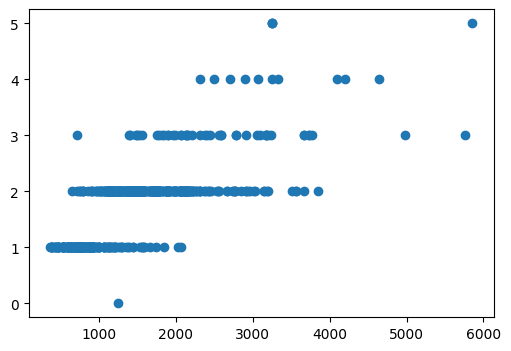

In [5]:
#checking outliers
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df["Sqft"],df["Bathroom"])

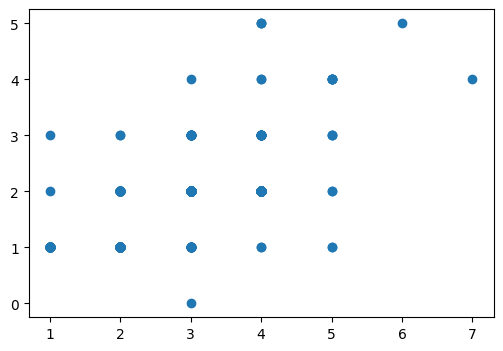

In [6]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df["Bedroom"],df["Bathroom"])

In [12]:
#taking necessary columns on data
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [7]:
#standard Scaling

scaler = StandardScaler()
df[["Sqft","Price"]] = scaler.fit_transform(df[["Sqft","Price"]])
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,-0.456393,2,7,2,2,2,0.000370
1,2,0.791798,5,7,4,2,2,0.449714
2,3,-0.507434,5,7,2,2,1,-0.111966
3,4,-0.089824,2,7,3,2,2,-0.477058
4,5,-0.730160,11,14,3,2,2,-0.477058


In [17]:
#finding the optimal number of clusters using k means

K = range(1,15)

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}


#making a seperate array file
array1 = df['Sqft'].to_numpy()
array2 = df['Price'].to_numpy()
array =np.array(list(zip(array1, array2))).reshape(len(array1), 2)
                
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(array)
    
    distortions.append(sum(np.min(cdist(array, kmeanModel.cluster_centers_,'euclidean'), axis=1))/array.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(array, kmeanModel.cluster_centers_,'euclidean'), axis=1))/array.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    


C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

In [15]:
#using distortions tabulating results

for key, val in mapping1.items():
    print(str(key)+ ":"+ str(val))

1:1.1026174096340793
2:0.7546661560526784
3:0.5911947291633968
4:0.4862215984171987
5:0.4378520867611029
6:0.39860483075169706
7:0.37604612426387557
8:0.3506218458654478
9:0.3412805818398184
10:0.3234310470440328
11:0.301090131388756
12:0.28881955767458933
13:0.27535613216419563
14:0.2667839546224363


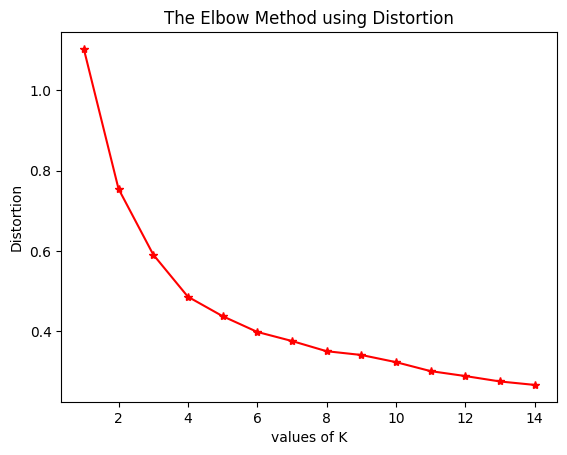

In [16]:
#visualizing the result

plt.plot(K, distortions, 'r*-')
plt.xlabel('values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


1:1289.9999999999995
2:575.884667187431
3:316.2762753465679
4:227.93911693305407
5:182.01361842867038
6:148.82399013996812
7:127.36145432052551
8:114.69083126878182
9:103.55455882255768
10:93.74714314785632
11:82.88180109277532
12:76.0002770563974
13:68.30500289978545
14:62.583997804766845


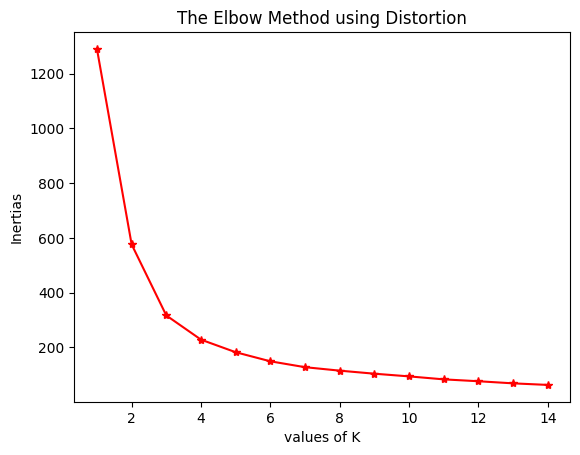

In [55]:
for key, val in mapping2.items():
    print(str(key)+ ":"+ str(val))
plt.plot(K, inertias, 'r*-')
plt.xlabel('values of K')
plt.ylabel('Inertias')
plt.title('The Elbow Method using Distortion')
plt.show()

    

In [1]:
#from distortion optimal value is 4
#from inertia optimal value is 3

In [2]:
#creating the optimal value

In [27]:
data = pd.DataFrame(array, columns = ('Sqft', 'Price'))

kmeans = KMeans(n_clusters = 4).fit(data)
predicted= kmeans.fit_predict(array)
print(predicted)


[1 0 1 1 3 0 1 3 3 1 3 3 1 3 1 0 3 3 0 3 0 0 3 0 2 0 2 2 3 3 1 1 1 1 3 3 3
 3 2 3 2 3 3 1 1 1 1 0 2 3 0 1 3 3 2 0 3 3 3 1 3 3 1 1 3 3 3 3 3 1 3 1 0 3
 3 1 1 1 0 3 1 3 3 3 1 1 2 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 2 2 0 0 3 1 0 1
 3 0 1 0 1 2 3 3 3 3 1 0 0 0 1 1 0 3 3 1 1 0 3 0 1 3 1 0 1 2 1 1 3 3 3 0 2
 3 1 0 0 1 3 3 3 3 1 1 1 1 3 3 2 3 0 0 0 1 3 1 0 0 0 3 0 0 3 1 1 1 3 2 3 3
 1 3 3 3 1 3 3 0 1 1 0 1 3 3 1 3 1 1 3 1 1 3 3 1 1 1 3 0 3 1 1 1 0 3 0 1 1
 0 3 0 3 3 3 0 1 1 1 0 1 1 3 1 1 3 1 3 1 2 1 0 3 0 3 2 1 0 0 0 1 1 3 3 1 0
 1 3 3 1 1 3 3 3 3 3 1 1 0 3 3 3 1 3 0 0 3 3 1 1 1 0 1 2 0 3 0 1 3 0 3 1 1
 0 0 0 2 0 1 1 0 1 1 0 1 1 3 1 1 1 1 1 1 0 0 0 1 1 3 2 0 3 1 1 2 3 1 1 0 3
 2 0 3 1 3 3 1 3 3 1 1 3 3 3 0 3 3 1 3 0 1 1 0 1 0 0 0 1 1 1 3 3 3 0 1 3 3
 3 3 3 1 1 3 3 1 3 1 0 1 0 1 1 0 0 3 1 3 1 2 1 1 3 0 0 3 1 1 3 0 0 3 3 3 3
 3 3 3 3 3 3 1 3 3 1 0 3 3 3 1 1 0 0 0 0 2 3 3 1 0 3 3 0 2 3 3 1 1 3 1 0 0
 0 0 0 1 1 3 1 3 3 1 3 1 1 1 1 1 0 1 1 0 3 1 1 0 3 2 0 0 0 1 0 1 1 1 3 1 0
 0 0 1 1 1 3 3 1 3 1 0 0 

C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.79535954,  0.88541099],
       [ 0.05611576, -0.21305139],
       [ 2.69030763,  2.9831357 ],
       [-0.8864281 , -0.72560381]])

In [29]:
data["cluster"] = predicted
data

,Sqft,Price,cluster
0,-0.456393,0.000370,1
1,0.791798,0.449714,0
2,-0.507434,-0.111966,1
3,-0.089824,-0.477058,1
4,-0.730160,-0.477058,3
...,...,...,...
640,-0.219747,-0.477058,1
641,-1.500419,-1.044355,3
642,-1.027127,-0.477058,3
643,0.234984,0.084622,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


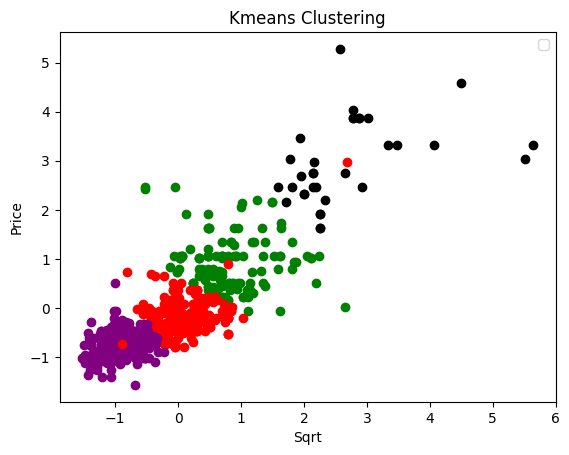

In [30]:
#scatter plot

data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
data4 = data[data.cluster==3]
plt.scatter(data1['Sqft'], data1['Price'], c= "green")
plt.scatter(data2['Sqft'], data2['Price'], c= "red")
plt.scatter(data3['Sqft'], data3['Price'], c= "black")
plt.scatter(data4['Sqft'], data4['Price'], c= "purple")

plt.scatter(centroids[:,0], centroids[:,1], c='red')
plt.xlabel("Sqrt")
plt.ylabel("Price")
plt.title("Kmeans Clustering")
plt.legend()